In [3]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
import numpy as np
import mxnet as mx
import random as rand
from sklearn.datasets.samples_generator import make_blobs
from utils import *
np.set_printoptions(precision=3)

# An Analysis of Mini Batch Gradient Descent

## Introduction

$\;\;\;\;\;\;$ Machine learning has become a emerging field in the field of computer science. Machine learning focuses on the optimization of complex functions; it looks to build a predictive model for a given problem by minimizing errors between predictions and actual data. Gradient descent is a common method used to iteratively reduce these errors each pass, making a prediction converge closer towards actual values. A problem for gradient descent in machine learning is computation time, as some problems contains large datasets which need to be computed over entirely. Mini batch gradient descent is a variation of gradient descent that aims to reduce computation time by preforming computations on a smaller subset of data rather than the entire set. This paper will walk you through the origins of mini batch gradient descent and how the method works on a given problem.

## Historical Context

$\;\;\;\;\;\;$It is unknown who created mini batch gradient descent. However, the method originates from stochastic gradient descent and is considered to be a stochastic function. The idea of stochastic gradient descent was first described by the two statisticians Herbert Robbins and Sutton Monro. They published their paper _A Stochastic Approximation Method_ which described a method on how to solve for an expected value of $x$ using an iterative method. They found that for a given experiment with data $x$ where $M(x)$ is the expected value at level $x$, they can solve for an approximation $θ$ such that $θ=x$. They show that to solve for $θ$, you can choose a value of $x_1,..,x_r$ arbitrarily then update $x_n$ successively from previously computed $x_1,...,x_{n-1}$, $M(x),...,M(x_{n-1})$ and $M'(x)...,M'(x_{n-1})$. It is shown that this method as $n$ approaches infinity $x_n = θ$ which means that the method should yield an accurate prediction over infinite iterations. The authors also proved that the method converges quickly and can be computed easily for a given problem.

$\;\;\;\;\;\;$Because computation of stochastic gradient descent over larger datasets are simple per iteration, it became very common in machine learning problems. However, stochastic gradient descent still had some downsides; Because it updates the model frequently at every example, it is sensitive to outliers and can cause the error to have high variance at each iteration. This may make it hard for the algorithm to settle on an error minimum for a given problem. To solve this problem, computer scientists created a variant of the stochastic method that instead of evaluating and updating the model on a single sample, it will instead update the model with a batch size of samples each iteration. By evaluating on batch as opposed to a singe sample, noisy data will have less of an effect on affecting the error term allowing for a smoother convergence towards an optimum and a more accurate prediction. It is for this reason that mini batch gradient descent has become the most common form of gradient descent in machine learning, sometimes being referred to as the stochastic gradient descent method.

## Description of Technique
$\;\;\;\;\;\;$Mini batch gradient descent is a method that randomly samples a batch size of data points and computes the gradient of the batch for each iteration. The generic gradient descent method is slow to evaluate large datasets as it required evaluating the gradients over the entire dataset. On the other hand, stochastic gradient descent computes the gradient for a single sample of data, but the frequency of updates is computationally expensive and calculations are sensitive to noisy data. Mini batch gradient descent looks to minimize the downsides of both of these methods by batching as computing the gradient is easier and the convergence towards and optimum is smoother. 

### Equation

$\;\;\;\;\;\;$In order to better understand the equation for mini batch gradient descent, let us first look at the general equation for stochastic gradient descent. The equation is as follows:
![title](general_eq.png)
where $f_{i}(x)$ is a loss function based on the training data instance indexed by $i$ and $n$ is the size of the dataset. The computational cost is linearly related to the size of $n$. The function is simply the sum of a finite number of functions.

Within each iteration of stochastic gradient descent, the gradient is computed by taking a random sample i and computing the gradient for that point. This is can be used to estimate the total gradient since
![title](gradient_eq.png)
Instead of computing the gradient of a given sample $i$, mini batch gradient descent computes the gradient over a set of samples of a given batch size. The equation to compute the gradient of a batch is as follows:
![title](minibatch_eq.png)
where $|B|$ is the cardinality of the batch. As the $|B|$ increases, so does the cost to compute the gradient. This can be used to update the current weights of a given solution each iteration by the following equation
![title](minibatch_update.png)
Where $x$ is the weight matrix we are looking to optimize and $η$ is a predefined learning rate. Since the gradient of the batch is an unbiased estimator for the total gradient, we can use the the estimated gradient the same way stochastic gradient descent uses its gradient approximation.

Because the stochastic gradient descent and mini batch gradient descent share the similar idea of estimating the gradient for a set of random samples, mini batch is a stochastic method and is sometimes referred to in machine learning as stochastic gradient descent.

### Choosing the batch size
$\;\;\;\;\;\;$When choosing a batch size for you algorithm, a few things must be taken in to consideration. As the batch size increases, the effect of noisy data on the gradient calculation is reduced, leading to a smother convergence towards an optimum. However, the larger the batch size, the more expensive it is to calculate the gradient at each step. This, mini batch gradient descent makes a compromise between a faster convergence and reduction of noise associated with the gradient update. Generally, batch sizes are selected based on computer architecture (base 2 numbers). It is up for the user to fine tune the batch size for their given problem.


### Implementing algorithm

$\;\;\;\;\;\;$When implementing an algorithm using the mini batch method, a user must define a list of parameters to feed the function. Mini batch gradient descent requires:

1. η,  A learning rate parameter which determines the step size to move in the direction calculated gradient for each iteration. 


2. m, which specifies how many samples to compute the gradient over (batch size)


3. X, the set of data to iterate over


4. $θ_{0}$, the initial weights of function to be optimized (sometimes can be initialized randomly within function)


5. S, Some stopping condition, generally a user will define the number of iterations to run or define a tolerance value

Below is a pseudo-code implementation of mini batch gradient descent

```python
def mini_batch_gd(η, m, X, θ, epochs)
    #run for number of epochs
    for i in range(epochs):
        #grab a random batch of batch size from data
        for batch in get_batch(X, m)
            #evaluate the gradient of batch with given loss fxn
            grad = evaluate_gradient(loss_function, batch, θ)
            #update weights of objective
            θ = θ - η * grad
    
```

## Example Implementations
$\;\;\;\;\;\;$Below are two examples of how mini batch gradient descent can be implemented. For each, we will compare the convergence of the loss of mini batch gradient descent and normal stochastic gradient descent

### Predfine a method for batching

In [42]:
#generate random batch
def next_batch(X, y, batchSize):   
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize]) 

## EXAMPLE 1: 2-class linear classification

$\;\;\;\;\;\;$For the first example, we will use mini batch gradient descent to classify a set of objects. The data used will be classified into 2 distinct classes. The algorithm will attempt to reduce the error in classifying a given point by utilizing the mean squares equation. By calculating the weights of a given batch, the sigmoid function can be used as a discriminant function to classify a given sample $X_i$.

### Predefine a discriminate function

In [43]:
#using sigmoid activation fxn for 2-way classification
#for any given x, fxn will discriminate what class it belongs to
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))       

### Gradient descent algorithm for linear classification

$\;\;\;\;\;\;$This implementation of mini batch gradient decent will find a set of weights $W$ such that if we look at any data point $X_{i}$, we can predict what class it belongs to by computing $X_{i} * W$ and passing it to the sigmoid function. It will run for a defined number of epochs and will calculate the gradient of data points of a given batch size. $W$ will update each iteration by multiplying the negative gradient by the learning rate. The weight matrix $W$ is initialized to random values at the start.

In [5]:
def mbd_linear(X, y, epochs, batch_size, learning_rate):
    '''
    Input:
    X    = set of features (what we use to predict)
    y    = the label (what we want to predict)
    epochs  = number of itterations to run
    batch_size = size of batch per itteration
    learning_rate = step size of a itteration
    
    Returns:
    W = predicted weights for discrimination line
    lossHist = loss fxn value at each step
    X = X with bias vector added
    '''
    
    #merge bias into X vector
    X = np.c_[np.ones((X.shape[0])), X]

    #initilize weights
    W = np.random.uniform(size=(X.shape[1],))
    
    #to graph effect of epoch overtime
    lossHist = []
    
    for epoch in np.arange(0,epochs):
        #find loss of epoch
        eLoss = []
        
        #process batch
        for (batchX, batchY) in next_batch(X,y, batch_size):
            #apply weights to batch
            wBatch = batchX.dot(W)
            
            #predict what class value is
            pred = sigmoid_activation(wBatch)
            
            #find error difference from actual classification
            error = pred - batchY
      
            #find total loss from sum of squares
            loss = np.sum(error ** 2)
            eLoss.append(loss)
            
            #calulate the gradient of the batch
            gradient = batchX.T.dot(error) / batchX.shape[0]

            #step in the gradient direction
            W += -learning_rate * gradient
            
        #update loss history
        lossHist.append(np.average(eLoss))   
    
    return W, lossHist, X

### Run algorithm on dataset

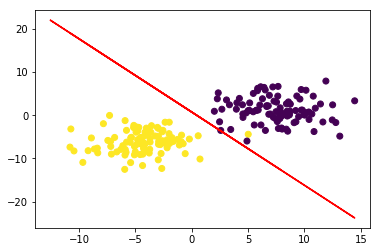

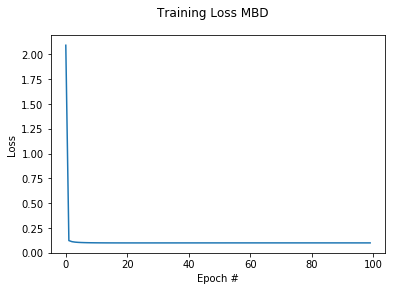

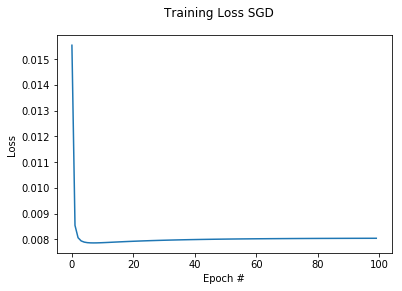

Predicted weights

[ 0.529 -1.214 -0.715]


In [17]:
# creates a set of n_samples of 2 different classifications
# Y is either class 0 or 1
(X, y) = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=2.5, random_state=25)

#define some inputs for algorithm
epochs = 100
batch_size = 16
learning_rate = 0.1

#run algorithim
W, lossHistory, X = mbd_linear(X, y, epochs, batch_size, learning_rate)


W1, lossHistory1, X1 = mbd_linear(X, y, epochs, 1, learning_rate)

#line of best fit using predicted weights
Y = (-W[0] - (W[1] * X)) / W[2]

# plot the original data along with our line of best fit
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")

# plot loss overtime
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss MBD")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

# plot loss for SGD
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory1)
fig.suptitle("Training Loss SGD")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

print("Predicted weights\n")
print(W)

### Example 1 Observations

$\;\;\;\;\;\;$The algorithm is able to find a W such that the error of classification is minimized. We can see from the first plot that the algorithm is able to classify the points based on their relative position to the line generated from W, however there is one noticeable outlier. Plot 2 shows that the optimal solution converges quickly for the first few iterations,then improvement slows drastically for each consecutive iteration. We can see that for this problem, stochastic gradient descent first converges quickly but tends to get slightly worse each consecutive iteration.


## EXAMPLE 2: polynomial regression

$\;\;\;\;\;\;$For this example, we will test a stochastic gradient descent method to fit a polynomial curve over a set of randomized data. The randomized data will be generated around the function:

$\;\;\;\;\;\;f(x) = 1 + 0.5x - 0.5 x^2 - 0.2 x^3 - 0.1 x^4 $
    
and will use mean squares to calculate the error term. The algorithm will minimize the error between all points by solving the coefficients of the polynomial of a given dimension size.



###  Gradient descent algorithm for polynomial regression

$\;\;\;\;\;\;$This implementation of mini batch gradient decent will find a an equation with the set of coefficients $W$ such that the error between all data points $X$ is minimized. It will run for a defined number of epochs and will calculate the gradient of data points of a given batch size. $W$ will update each iteration by multiplying the negative gradient by the learning rate. The coefficient matrix $W$ is initialized to random values at the start.

In [7]:
#formats X values for polynomial of dimension dim
def polynomial_features(x, dim):
    return np.column_stack([x ** i for i in range(dim + 1)])

def mbd_poly(X, y, dim, epoch, batch_size, learning_rate):
    '''
    Input:
    X    = set of features (what we use to predict)
    y    = the label (what we want to predict)
    dim  = dimmension of polynomial to solve
    epoch = number of itterations to run
    batch_size = size of batch per itteration
    learning_rate = step size of a itteration
    
    Returns:
    W = predicted coefficients of polynomial
    lossHist = loss fxn value at each step
    '''
    
    #format input to fit polynomial of given dimmension
    X = polynomial_features(X,dim)
    
    print("[INFO] starting training...")
    #initilize random weights
    W = np.random.uniform(size=(dim+1,))
    
    #to graph effect of epoch
    lossHist = []
    
    for epoch in np.arange(0,epochs):
        #find loss of epoch
        eLoss = []
        
        #process batch
        for (batchX, batchY) in next_batch(X,y, batch_size):
            #dot product of batch of features with weight
            wBatch = batchX.dot(W)
            
            #find error difference from true dataset
            error = wBatch - batchY
      
            #find total loss from sum of squares
            loss = np.sum(error ** 2)
            eLoss.append(loss)
           
            #calulate the gradient of the batch
            gradient = batchX.T.dot(error) / batchX.shape[0]
            
            #step in the gradient direction
            W += -learning_rate * gradient
            
        #update loss history
        lossHist.append(np.average(eLoss))   
    
    return W, lossHist

### Run algorithm on randomized data

[INFO] starting training...
[INFO] starting training...


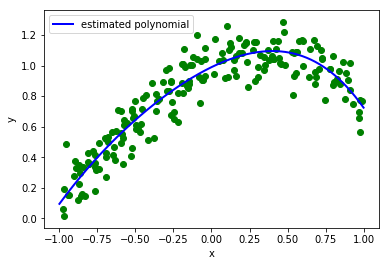

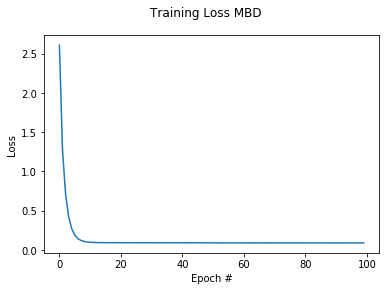

<Figure size 432x288 with 0 Axes>

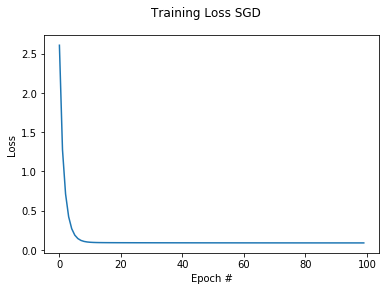


predicted polynomial coefficients MBD
[ 0.989  0.485 -0.467 -0.17  -0.112]

actual coefficients
[1, 0.5, -0.5, -0.2, -0.1]


<Figure size 432x288 with 0 Axes>

In [41]:
np.random.seed(int(time.time()))
#fxn = 1 + 0.5 * x - 0.5 x^2 - 0.2 x^3 - 0.1 x^4
coeffs = [1, 0.5, -0.5, -0.2, -0.1]
#generate random data around the curve
x, y = polynomial_data(coeffs, 200)
#show random data

#formating
y = y.ravel()

#parameters for function
epoch = 100
dim = 4
batch_size = 8
learning_rate = 0.1

#run algorithm
W, lossHist = mbd_poly(x, y, dim, epoch, batch_size , learning_rate)
W1, lossHist1 = mbd_poly(x, y, dim, epoch, 1 , learning_rate)

#plot prediced curve, true curve, and data
plt.scatter(x, y, color='green')
plt.xlabel("x")
plt.ylabel("y")
plot_polynomial(W, color='blue', label='estimated polynomial')
plt.legend()

#plot error
fig = plt.figure()
plt.plot(np.arange(epoch), lossHist)
fig.suptitle("Training Loss MBD")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()
fig = plt.figure()

#plot error
fig = plt.figure()
plt.plot(np.arange(epoch), lossHist)
fig.suptitle("Training Loss SGD")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()
fig = plt.figure()

#compare W to actual coeffs
print("\npredicted polynomial coefficients MBD")
print(W.flatten())
print("\nactual coefficients")
print(coeffs)

# Example 2 Observations

$\;\;\;\;\;\;$The algorithm is able to find a W such that the error of between all points near the curve is minimized. We can see from the first plot that the algorithm is able to fit a curve over the dataset that is very close to the original function. Plot 2 shows that the optimal solution converges quickly for the first few iterations,then improvement slows drastically for each consecutive iteration. We can see that the convergence of both methods are relatively the same, for this example, meaning that there is not to much noise associated with the given data. We can see that the coefficients the algorithm computed are very close to the original function. Of course, the result is also highly dependent on the arrangement of the randomized data.


## Conclusion

$\;\;\;\;\;\;$Mini batch gradient descent will continue to be the most widely used method for gradient descent for machine learning algorithms due to its customizability with batch sizes. The ability to fine tune a batch size for a given problem allows a user to find an optimal configuration that allows for a smooth convergence towards an optimal solution while being able to reduce the impact of noisy data. 

## Biblography

Herbert Robbins and Sutton Monro _A Stochastic Approximation Method_ The Annals of Mathematical Statistics, Vol. 22, No. 3. (Sep., 1951), pp. 400-407.